# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [3]:
# Manter somente os dados de 2020 em diante
df_2020 = df[df['Data Emissão'] >= '2020-01-01']
df_2020.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes


In [4]:
# Analisar a proporção de notas que tiveram retorno>0 por categoria de estabelecimento
df_2020.groupby('categoria')['flag_credito'].mean()


categoria
Alimentos       0.681584
Auto posto      0.250000
Construção      0.468810
Farmácia        0.351556
Mercado         0.478155
Restaurantes    0.746214
Varejo          0.138373
Vestuário       0.230729
não definido    0.363394
Name: flag_credito, dtype: float64

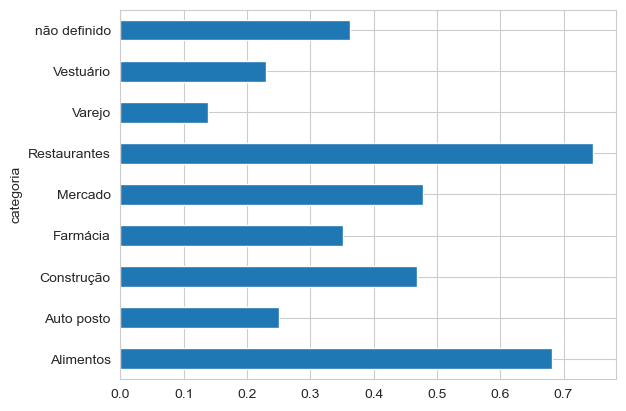

In [5]:
# Gráfico
df_2020.groupby('categoria')['flag_credito'].mean().plot.barh()
plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [8]:
# Definindo o evento: retorno > 0
df_2020['evento'] = df_2020['Retorno'] > 0

# Calculando a distribuição de eventos e não eventos para cada categoria
distribuicao = df_2020.groupby('categoria')['evento'].agg(['mean', 'count'])
distribuicao['nao_evento'] = 1 - distribuicao['mean']

# Filtrando categorias com pelo menos um evento e um não evento
distribuicao_filtrada = distribuicao[(distribuicao['mean'] > 0) & (distribuicao['nao_evento'] > 0)]

# Calculando o WOE para cada categoria

distribuicao_filtrada['WOE'] = np.log(distribuicao_filtrada['mean'] / distribuicao_filtrada['nao_evento'])
distribuicao_filtrada[['mean', 'nao_evento', 'WOE']]


C:\Users\ricme\AppData\Local\Temp\ipykernel_10600\1919776662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['evento'] = df_2020['Retorno'] > 0


,mean,nao_evento,WOE
categoria,,,
Alimentos,0.681584,0.318416,0.761062
Auto posto,0.250000,0.750000,-1.098612
Construção,0.468810,0.531190,-0.124921
Farmácia,0.351556,0.648444,-0.612208
Mercado,0.478155,0.521845,-0.087435
Restaurantes,0.746214,0.253786,1.078520
Varejo,0.138373,0.861627,-1.828866
Vestuário,0.230729,0.769271,-1.204199
não definido,0.363394,0.636606,-0.560662


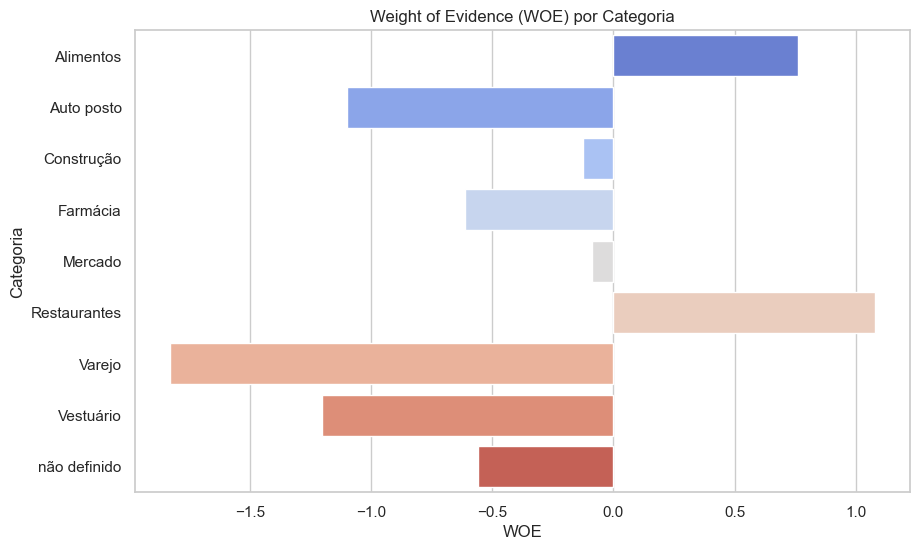

In [11]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=distribuicao_filtrada['WOE'], y=distribuicao_filtrada.index, palette="coolwarm")
plt.title('Weight of Evidence (WOE) por Categoria')
plt.xlabel('WOE')
plt.ylabel('Categoria')

# Mostrando o gráfico
plt.show()

**Tabela**
- Categorias como "Alimentos" e "Restaurantes" têm WOEs positivos altos, indicando uma forte associação com o evento (retorno > 0).
- Por outro lado, categorias como "Vestuário" e "Auto posto" têm WOEs negativos significativos, sugerindo uma forte associação com o não evento (retorno <= 0).
- Categorias como "Mercado" têm WOEs próximos a zero, indicando que não são bons discriminadores para o evento em questão.

**Gráfico**
- O gráfico de barras fornece uma representação visual das informações da tabela, permitindo identificar rapidamente as categorias com maior e menor WOE.
- Categorias à esquerda (com barras para a esquerda do zero) estão mais associadas ao não evento, enquanto aquelas à direita (com barras para a direita do zero) estão mais associadas ao evento.
- Em resumo, o WOE ajuda a identificar quais categorias são indicativas de um retorno maior que zero e quais não são. Esta análise pode ser particularmente útil para tomada de decisões estratégicas, segmentação de mercado, ou para desenvolver modelos preditivos mais robustos

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [12]:
# Calculando o Information Value (IV)
distribuicao_filtrada['IV'] = distribuicao_filtrada['WOE'] * (distribuicao_filtrada['mean'] - distribuicao_filtrada['nao_evento'])
iv_total = distribuicao_filtrada['IV'].sum()

iv_total, distribuicao_filtrada['IV']


(3.6745859583690423,
 categoria
 Alimentos       0.276393
 Auto posto      0.549306
 Construção      0.007792
 Farmácia        0.181758
 Mercado         0.003820
 Restaurantes    0.531093
 Varejo          1.322733
 Vestuário       0.648511
 não definido    0.153179
 Name: IV, dtype: float64)

<Axes: ylabel='categoria'>

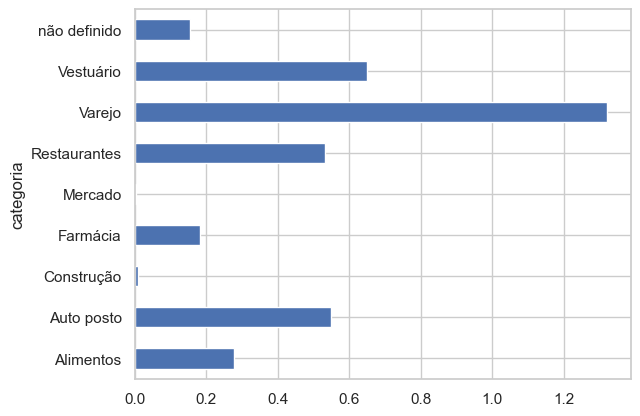

In [15]:
distribuicao_filtrada['IV'].plot.barh()

## Conclusões da Análise de WOE

1. **Identificação de Categorias Fortes e Fracas**: 
   - Categorias com WOEs altos positivos (como "Alimentos" e "Restaurantes") são fortemente associadas ao evento de interesse (neste caso, retorno > 0). Estas categorias têm maior probabilidade de levar ao evento.
   - Categorias com WOEs altos negativos (como "Vestuário" e "Auto posto") estão mais associadas à ausência do evento. Elas têm menor probabilidade de resultar no evento.

2. **Discriminação**:
   - Categorias com WOEs próximos de zero (como "Mercado") indicam pouca ou nenhuma discriminação em relação ao evento. Elas não são particularmente úteis para prever o evento de interesse.

3. **Direção das Relações**:
   - O sinal do WOE (positivo ou negativo) fornece uma direção clara da relação entre a categoria e a probabilidade do evento ocorrer.

### Conclusões da Análise de IV

1. **Força Preditiva da Variável**:
   - Um IV total muito alto (3.67 neste caso) indica que a variável "categoria" tem uma força preditiva muito forte para o evento de interesse.
   - Em geral, um IV acima de 0.3 é considerado muito forte.

2. **Contribuição de Categorias Individuais**:
   - O IV para categorias específicas ajuda a identificar quais delas são mais importantes na previsão do evento. Por exemplo, categorias como "Vestuário" e "Auto posto" têm IVs altos, indicando uma forte influência, mesmo que essa influência seja negativa em relação ao evento.
